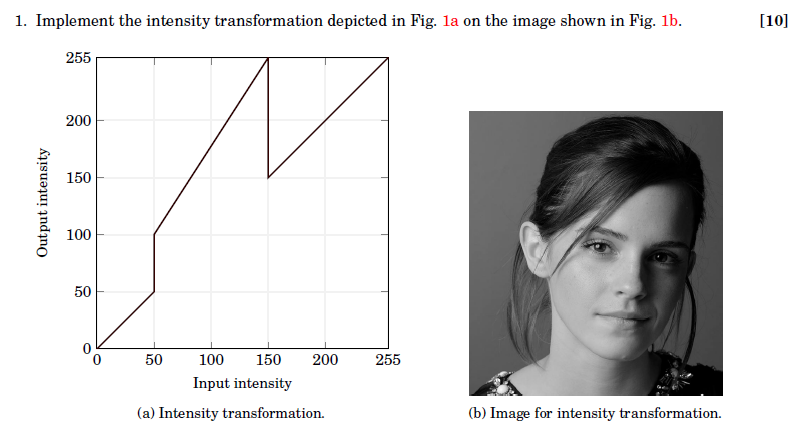

In [60]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [90]:

def intensity_transformation(image):
    c = np.array([(50, 50), (150, 255)])
    t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
    t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
    t3 = np.linspace(c[1,0] + 1, 255, 255 - c[1,0]).astype('uint8')

    transform = np.concatenate((t1, t2), axis=0).astype('uint8')
    transform = np.concatenate((transform, t3), axis=0).astype('uint8')
    return transform


In [93]:
image = cv.imread('./images/emma.jpg', cv.IMREAD_GRAYSCALE)
transform =  intensity_transformation(image)
image_transformed = cv.LUT(image, transform)

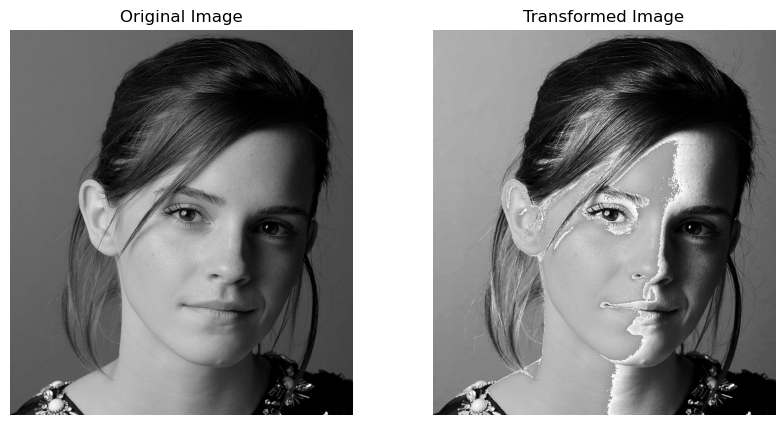

In [146]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image_transformed, cmap='gray',vmin=0, vmax=255)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

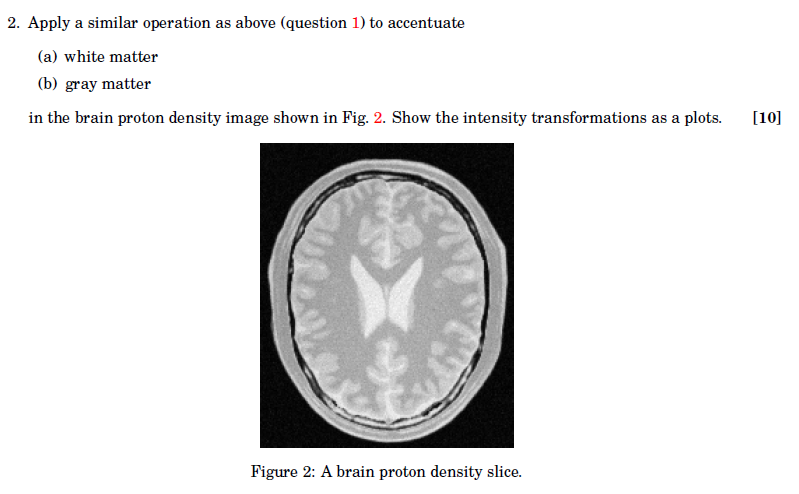

In [96]:
def intensity_transformation_white_matter(image):
    c = np.array([(175, 175)])
    t1 = np.linspace(0, 0, c[0,0] + 1 - 0).astype('uint8')
    t2 = np.linspace(c[0,1] + 1, 255, 255 - c[0,0]).astype('uint8')

    transform = np.concatenate((t1, t2), axis=0).astype('uint8')
    return transform

In [99]:
image2 = cv.imread('./images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

transform2_white_matter =  intensity_transformation_white_matter(image2)
image2_transformed_white_matter = cv.LUT(image2, transform2_white_matter)

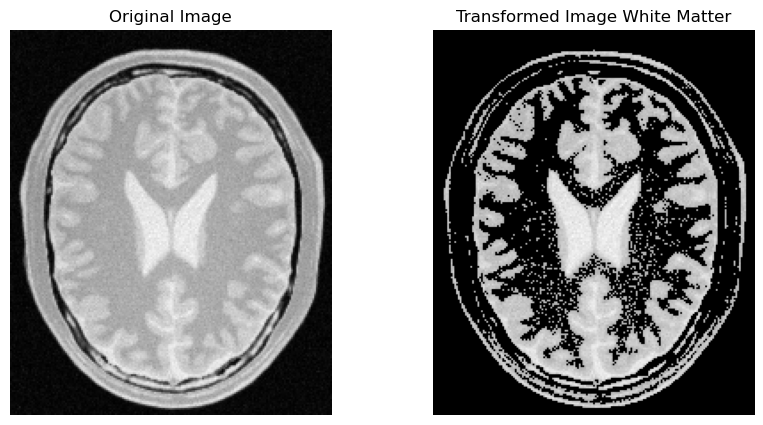

In [176]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image2, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image2_transformed_white_matter, cmap='gray' ,vmin=0, vmax=255)
plt.title('Transformed Image White Matter')
plt.axis('off')
plt.show()

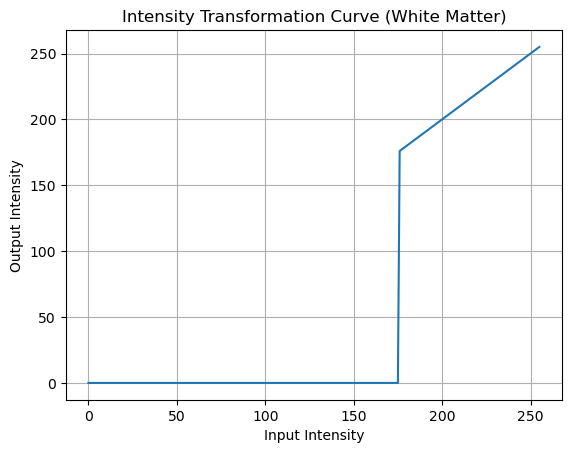

In [105]:
transform_white_matter = intensity_transformation_white_matter(None)

# Plot mapping curve
plt.plot(np.arange(256), transform_white_matter)
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Transformation Curve (White Matter)')
plt.grid(True)
plt.show()

In [106]:
def intensity_transformation_gray_matter(image):
    c = np.array([(125, 125) , (175,175)])
    t1 = np.linspace(0, 0, c[0,0] + 1 - 0).astype('uint8')
    t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
    t3 = np.linspace(0, 0, 255 - c[1,0]).astype('uint8')

    transform = np.concatenate((t1, t2), axis=0).astype('uint8')
    transform = np.concatenate((transform, t3), axis=0).astype('uint8')
    return transform

In [107]:
transform2_gray_matter =  intensity_transformation_gray_matter(image2)
image2_transformed_gray_matter = cv.LUT(image2, transform2_gray_matter)

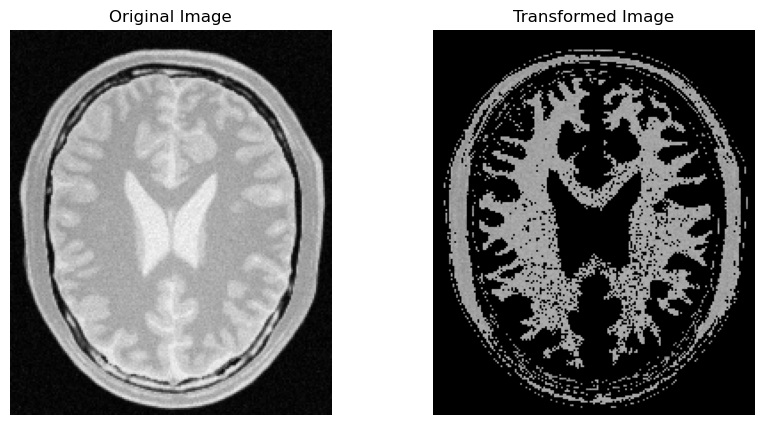

In [148]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image2, cmap='gray',vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image2_transformed_gray_matter, cmap='gray',vmin=0, vmax=255)
plt.title('Transformed Image Gray Matter')
plt.axis('off')
plt.show()

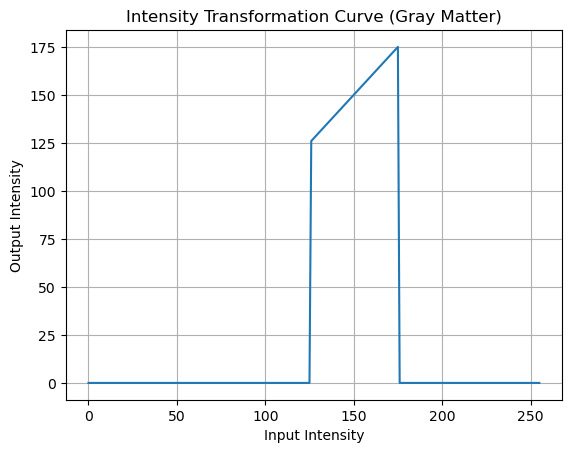

In [149]:
# Generate transform
transform_gray_matter = intensity_transformation_gray_matter(None)

# Plot mapping curve
plt.plot(np.arange(256), transform_gray_matter)
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.title('Intensity Transformation Curve (Gray Matter)')
plt.grid(True)
plt.show()

# ---------------------------------------------------------------------------------------------------------------



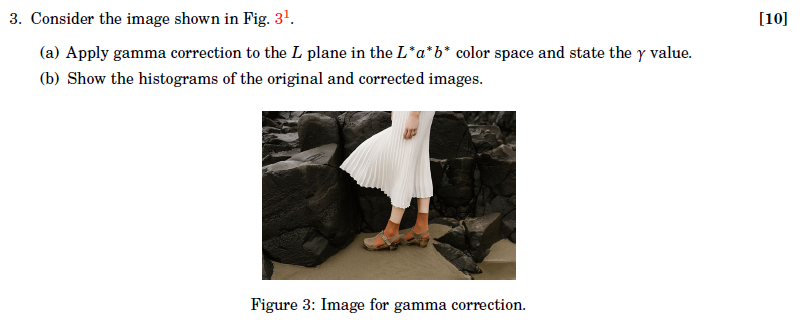

In [150]:
def gamma_correction(image,gamma):
    t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
    g = cv.LUT(image, t)
    return g

In [151]:
image3 = cv.imread('./images/highlights_and_shadows.jpg')
image3_rgb = cv.cvtColor(image3, cv.COLOR_BGR2RGB)

image3_lab = cv.cvtColor(image3, cv.COLOR_RGB2LAB)
L, a, b = cv.split(image3_lab)

L_corrected = gamma_correction(L,0.7)

lab_corrected = cv.merge([L_corrected, a, b])
corrected_img = cv.cvtColor(lab_corrected, cv.COLOR_LAB2RGB)

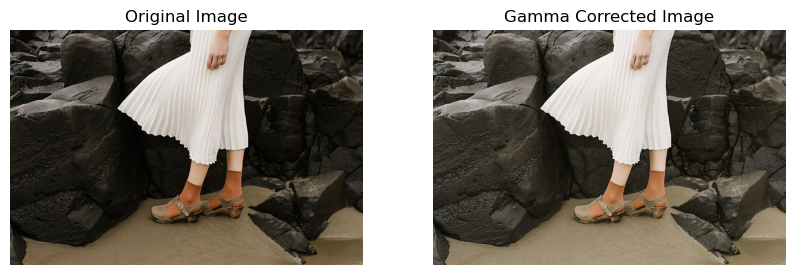

In [152]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image3_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image3_corrected)
plt.title('Gamma Corrected Image')
plt.axis('off')
plt.show()

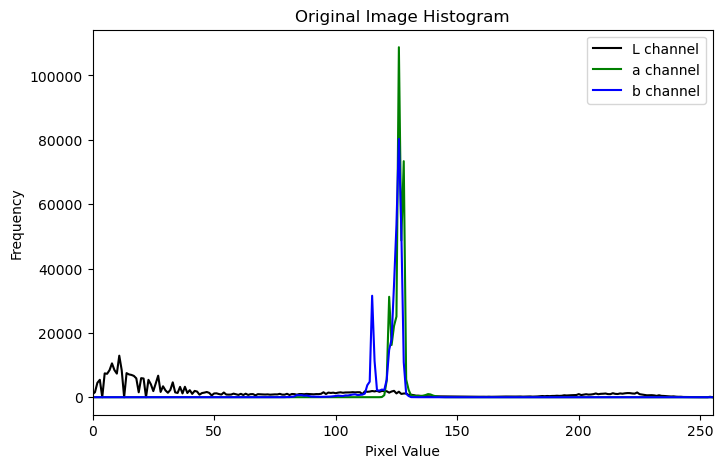

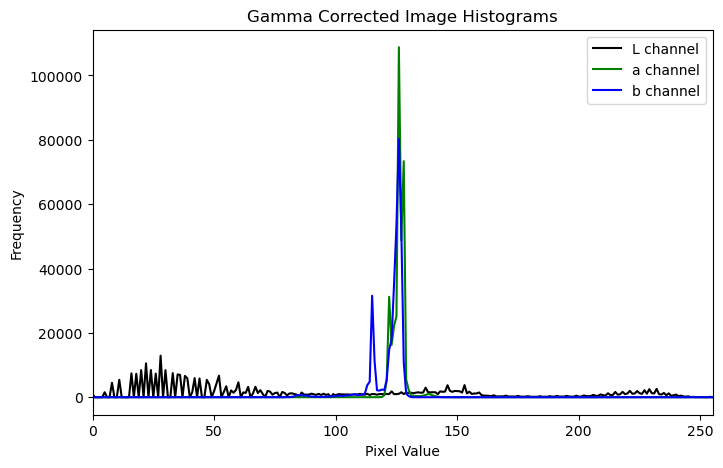

In [153]:
def plot_lab_histograms_same_graph(L, a, b, title):
    hist_L = cv.calcHist([L], [0], None, [256], [0, 256])
    hist_a = cv.calcHist([a], [0], None, [256], [0, 256])
    hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

    plt.figure(figsize=(8,5))
    plt.plot(hist_L, color='black', label='L channel')
    plt.plot(hist_a, color='green', label='a channel')
    plt.plot(hist_b, color='blue', label='b channel')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.legend()
    plt.show()

plot_lab_histograms_same_graph(L, a, b, 'Original Image Histogram')
plot_lab_histograms_same_graph(L_corrected, a, b, 'Gamma Corrected Image Histograms')

# ---------------------------------------------------------------------------------------------------------------


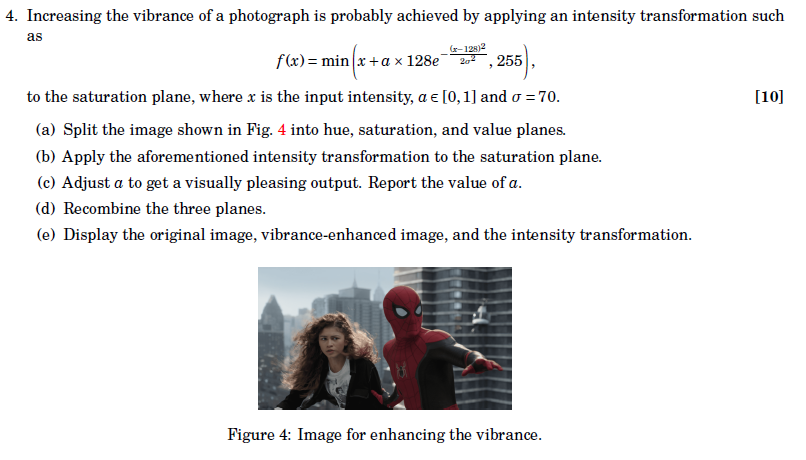

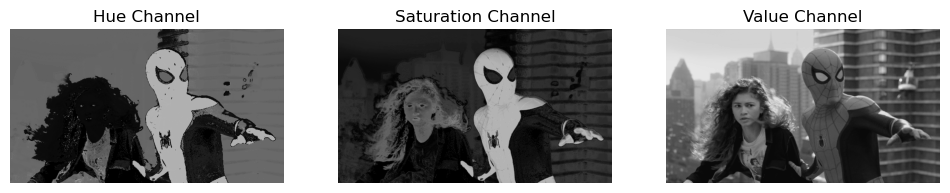

In [159]:
image4 = cv.imread('./images/spider.png')
hsv_image = cv.cvtColor(image4, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_image)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(h, cmap='gray',vmin=0, vmax=255) 
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray' ,vmin=0, vmax=255)  
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray' ,vmin=0, vmax=255)
plt.title('Value Channel')
plt.axis('off')

plt.show()

In [130]:
def intensity_transformation_saturation_plane(s , a ,sigma = 70):
    x = s.astype(np.float32)
    s_transformed = np.minimum( x + a * 128 * np.exp(- ((x - 128)**2) / (2 * (sigma**2))) , 255)
    return s_transformed.astype(np.uint8)

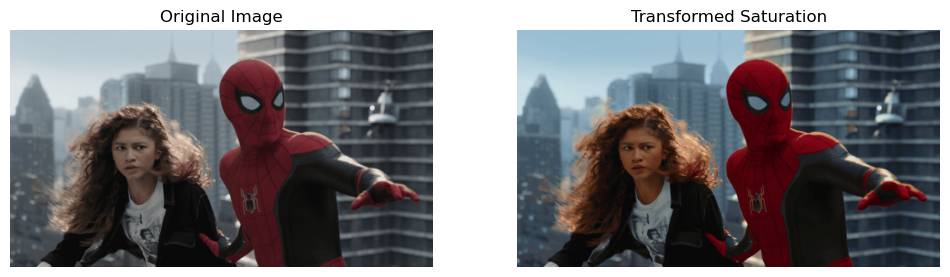

In [131]:
s_transformed = intensity_transformation_saturation_plane(s , 0.7 )
hsv_transformed = cv.merge([h, s_transformed, v])
result = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2RGB)
image4_rgb = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image4_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(result)
plt.title(f'Transformed Saturation')
plt.axis('off')

plt.show()

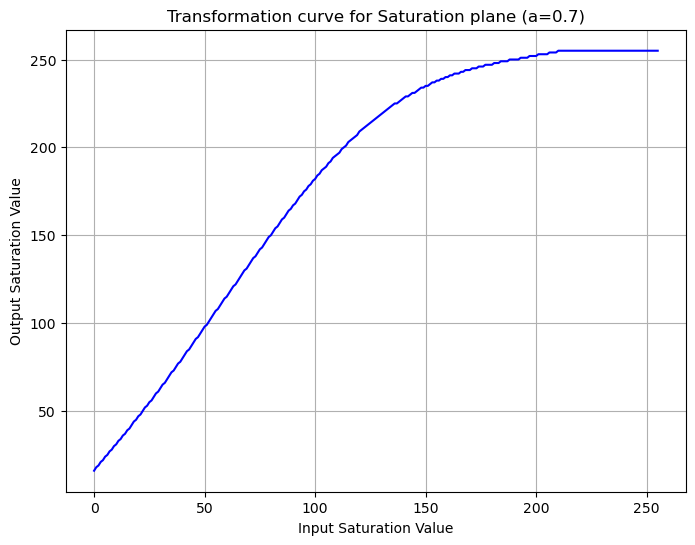

In [133]:
s_values = np.arange(0, 256, 1, dtype=np.uint8)
a = 0.7

transformed = intensity_transformation_saturation_plane(s_values, a)

plt.figure(figsize=(8,6))
plt.plot(s_values, transformed, color='blue')
plt.title('Transformation curve for Saturation plane (a=0.7)')
plt.xlabel('Input Saturation Value')
plt.ylabel('Output Saturation Value')
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------------------------------------------------

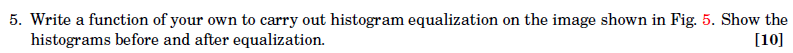

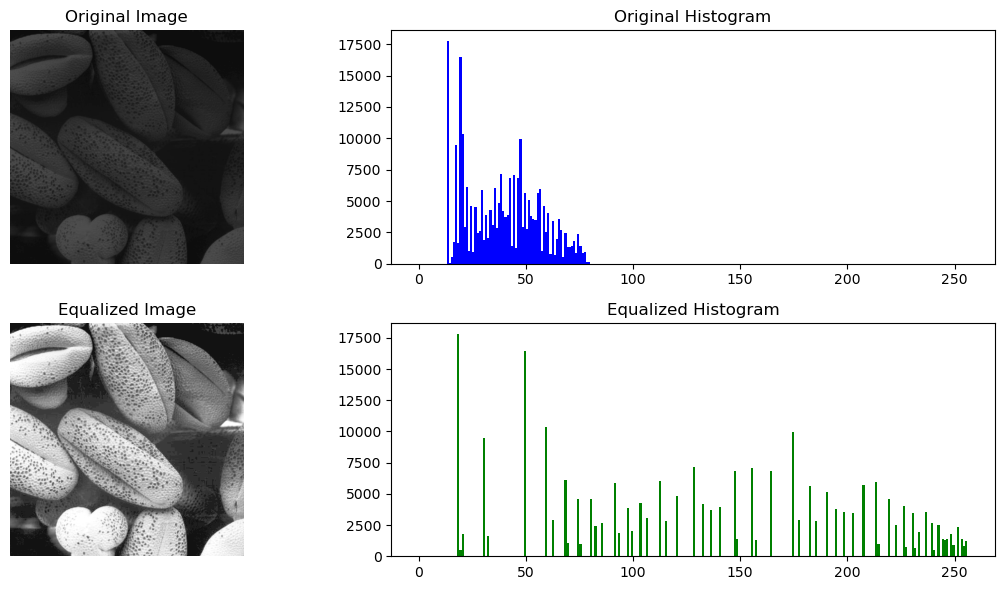

In [178]:
def h_equlize(image):
    rows, cols = image.shape
    total_pixels = rows * cols

    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    hist = hist.flatten()
    pdf = hist / total_pixels
    cdf = np.cumsum(pdf)
    cdf_normalized = np.round(cdf * 255).astype('uint8')
    equalized_img = cdf_normalized[image]
    return equalized_img 

image5 = cv.imread("./images/shells.tif", cv.IMREAD_GRAYSCALE)
equalized_img = h_equlize(image5)
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image5, cmap='gray' ,vmin=0 , vmax=255)
plt.title('Original Image')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.hist(image5.ravel(), bins=256, range=[0, 256], color='blue')
plt.title('Original Histogram')


plt.subplot(2, 2, 3)
plt.imshow(equalized_img, cmap='gray',vmin=0, vmax=255)
plt.title('Equalized Image')
plt.axis('off')


plt.subplot(2, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256], color='green')
plt.title('Equalized Histogram')

plt.tight_layout()
plt.show()


# ----------------------------------------------------------------------------------------------------------------


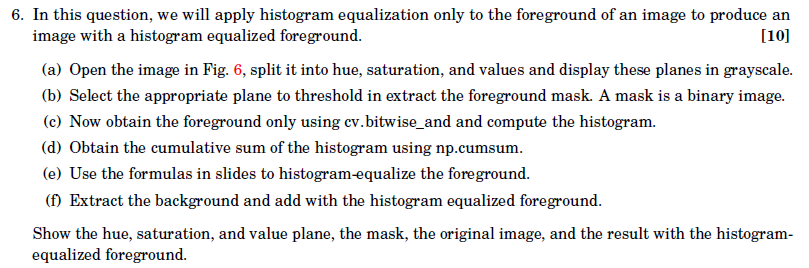

In [250]:
image6 = cv.imread("./images/jeniffer.jpg")
image6_rgb = cv.cvtColor(image6 , cv.COLOR_BGR2RGB)

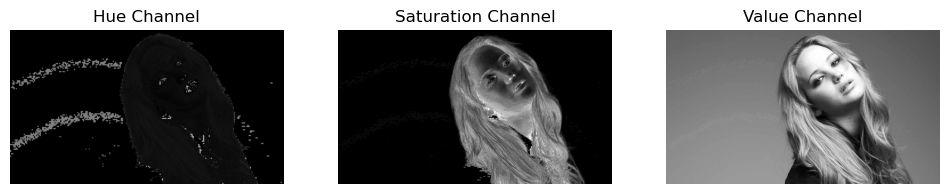

In [251]:
hsv_image6 = cv.cvtColor(image6, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_image6)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(h, cmap='gray',vmin=0, vmax=255)
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(s, cmap='gray',vmin=0, vmax=255) 
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(v, cmap='gray',vmin=0, vmax=255) 
plt.title('Value Channel')
plt.axis('off')

plt.show()

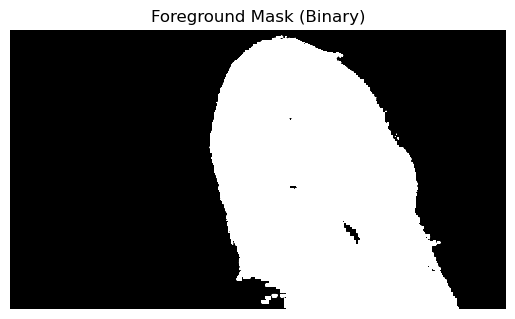

In [252]:
plane_to_threshold = s
thresholds = 13
foreground_mask = (s > thresholds).astype(np.uint8) * 255

# Display the mask
plt.imshow(foreground_mask, cmap='gray',vmin=0, vmax=1)
plt.title('Foreground Mask (Binary)')
plt.axis('off')
plt.show()

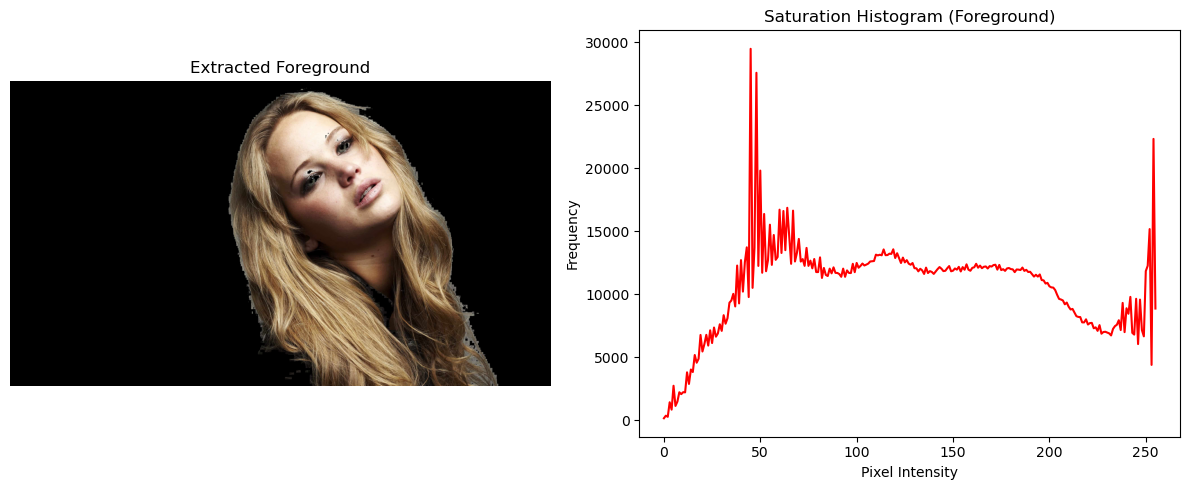

In [253]:
# Apply mask
foreground = cv.bitwise_and(image6_rgb, image6_rgb, mask=foreground_mask)

# Calculate histogram of S channel (foreground only)
hist_s_foreground = cv.calcHist([foreground], [0], foreground_mask, [256], [0, 256])

# Plot histograms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(foreground)
plt.title('Extracted Foreground')
plt.axis('off')

plt.subplot(1,2,2)
plt.plot(hist_s_foreground, color='red')
plt.title('Saturation Histogram (Foreground)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

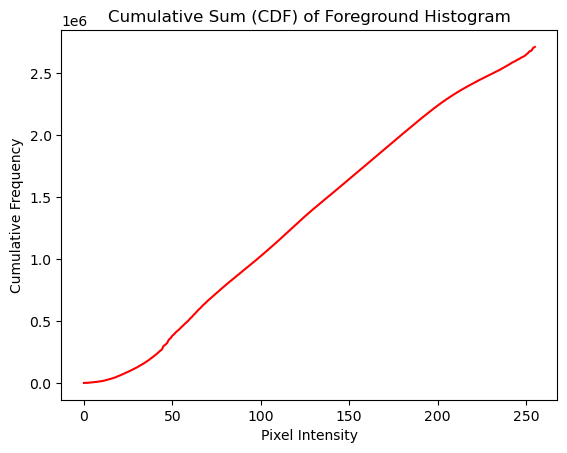

In [254]:
cdf = np.cumsum(hist_s_foreground)

plt.plot(cdf, color='red')
plt.title('Cumulative Sum (CDF) of Foreground Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.show()

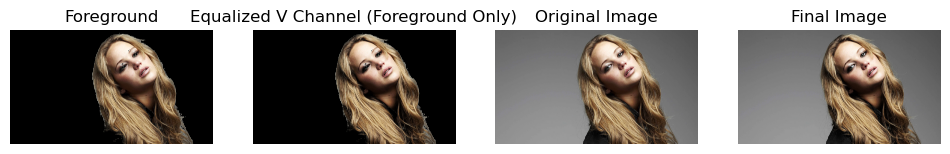

In [279]:
foreground_hsv= cv.cvtColor(foreground, cv.COLOR_RGB2HSV)
h, s, v = cv.split(foreground_hsv)

num_foreground_pixels = cv.countNonZero(foreground_mask)

hist = cv.calcHist([v], [0], foreground_mask, [256], [0, 256]).flatten()

cdf = hist.cumsum()
L = 256

t = np.array([(L-1)/num_foreground_pixels * cdf[k] for k in range(256)], dtype=np.uint8)

v_eq = v.copy()
foreground_indices = foreground_mask > 0
v_eq[foreground_indices] = t[v[foreground_indices]]

foreground_hsv_eq = cv.merge([h, s, v_eq])

foreground_eq = cv.cvtColor(foreground_hsv_eq, cv.COLOR_HSV2RGB)



background_mask = cv.bitwise_not(foreground_mask)
image6_rgb = image6_rgb.copy()
background = cv.bitwise_and(image6_rgb, image6_rgb, mask=background_mask)
final_image = cv.add(background, foreground_eq)

fig, ax = plt.subplots(1,4, figsize=(12,6))
ax[0].imshow(foreground)
ax[0].set_title('Foreground')
ax[0].axis('off')
ax[1].imshow(foreground_eq)
ax[1].set_title('Equalized V Channel (Foreground Only)')
ax[1].axis('off')
ax[2].imshow(image6_rgb)
ax[2].set_title('Original Image')
ax[2].axis('off')
ax[3].imshow(final_image)
ax[3].set_title('Final Image')
ax[3].axis('off')
plt.show()

# ----------------------------------------------------------------------------------------------------------------


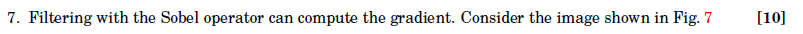
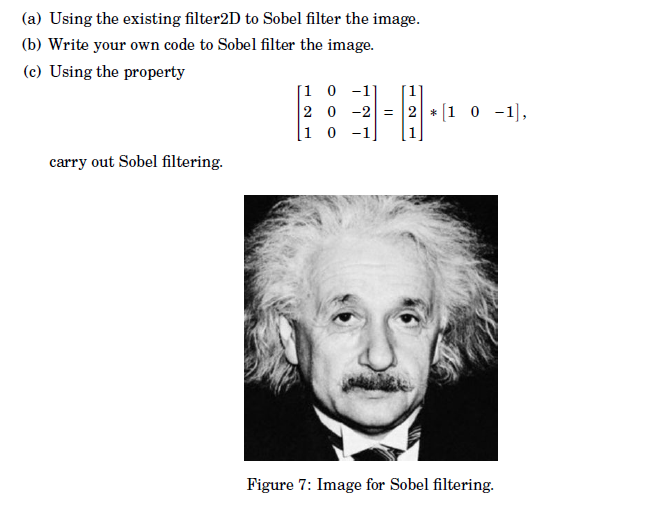

In [163]:
image7 = cv.imread("./images/einstein.png" , cv.IMREAD_GRAYSCALE)

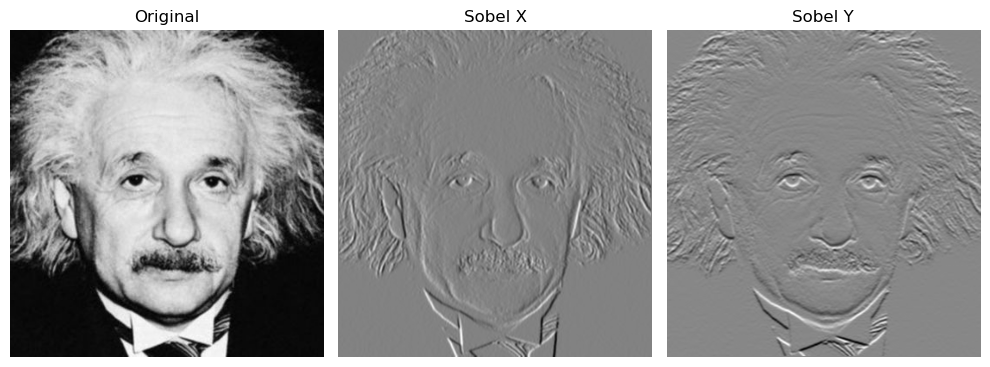

In [263]:
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0,   0,  0],
    [1,   2,  1]
], dtype=np.float32)

gx = cv.filter2D(image7, cv.CV_64F, sobel_x)
gy = cv.filter2D(image7, cv.CV_64F, sobel_y)

plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow(image7, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gx, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gy, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.tight_layout()
plt.show()


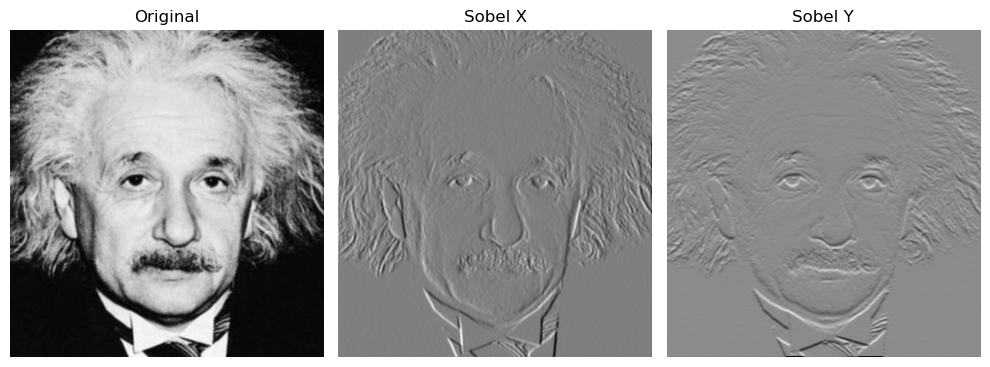

In [265]:
rows7, cols7 = image7.shape

sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

sobel_y = np.array([
    [-1, -2, -1],
    [0,   0,  0],
    [1,   2,  1]
], dtype=np.float32)

padded = np.pad(image7, ((1, 1), (1, 1)), mode='constant', constant_values=0)

gx = np.zeros_like(image7, dtype=np.float32)
gy = np.zeros_like(image7, dtype=np.float32)

# Manual convolution
for i in range(rows7):
    for j in range(cols7):
        region = padded[i:i+3, j:j+3]   # 3x3 region
        gx[i, j] = np.sum(region * sobel_x)
        gy[i, j] = np.sum(region * sobel_y)


# Plot results
plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
plt.imshow(image7, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gx, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gy, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.tight_layout()
plt.show()


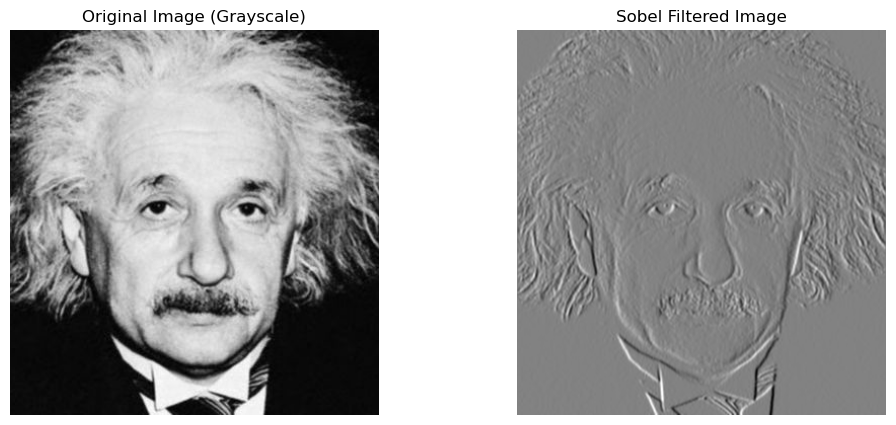

In [266]:
from scipy.signal import convolve2d

h = np.array([1, 0, -1])   
v = np.array([1, 2, 1])     

h_kernel = h.reshape(1, 3)  
intermediate = convolve2d(image7, h_kernel, mode='same', boundary='symm')

v_kernel = v.reshape(3, 1)
sobel_filtered = convolve2d(intermediate, v_kernel, mode='same', boundary='symm')

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Original Image (Grayscale)')
plt.imshow(image7, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sobel Filtered Image')
plt.imshow(sobel_filtered, cmap='gray')
plt.axis('off')

plt.show()

# ----------------------------------------------------------------------------------------------------------------

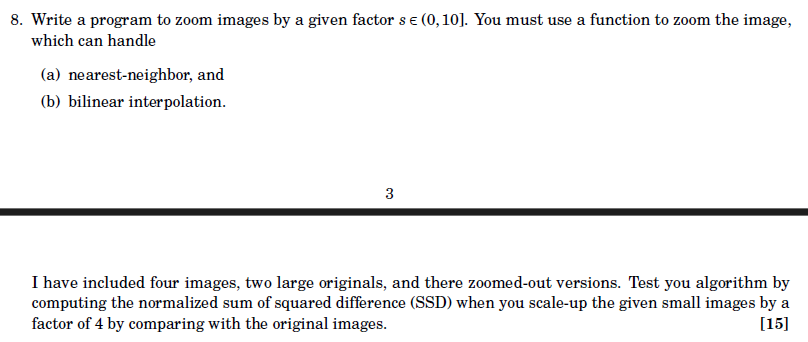

Normalized SSD (Nearest Neighbor): 136.2691
Normalized SSD (Bilinear): 115.0919


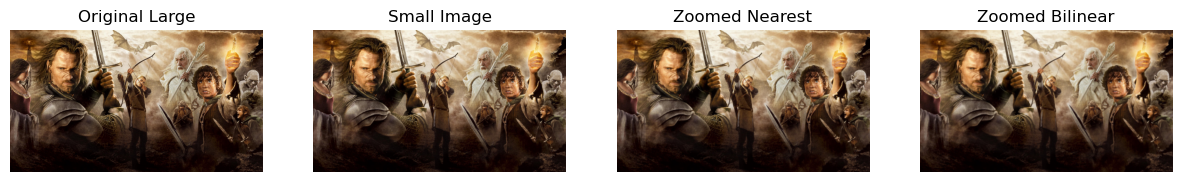

In [245]:
def zoom_image(img, scale, method='nearest'):
    
    h, w = img.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    
    if method == 'nearest':
        interp = cv.INTER_NEAREST
    elif method == 'bilinear':
        interp = cv.INTER_LINEAR
    
    zoomed = cv.resize(img, (new_w, new_h), interpolation=interp)
    return zoomed

def normalized_ssd(img1, img2):
    
    diff = img1.astype(np.float32) - img2.astype(np.float32)
    ssd = np.sum(diff ** 2)
    norm_ssd = ssd / np.prod(img1.shape)
    
    return norm_ssd


original_large = cv.imread('./images/a1q8images/im01.png', cv.IMREAD_COLOR)
small_image = cv.imread('./images/a1q8images/im01small.png', cv.IMREAD_COLOR)


scale_factor = 4
zoomed_nearest = zoom_image(small_image, scale_factor, method='nearest')
zoomed_bilinear = zoom_image(small_image, scale_factor, method='bilinear')

# Resize original_large to match zoomed images (in case of rounding)
oh, ow = original_large.shape[:2]
zh, zw = zoomed_nearest.shape[:2]

# Crop original image to exactly zoomed image size to compare
original_cropped = original_large[:zh, :zw]

# Compute normalized SSD for both methods
ssd_nearest = normalized_ssd(zoomed_nearest, original_cropped)
ssd_bilinear = normalized_ssd(zoomed_bilinear, original_cropped)

print(f"Normalized SSD (Nearest Neighbor): {ssd_nearest:.4f}")
print(f"Normalized SSD (Bilinear): {ssd_bilinear:.4f}")

# Show images side by side for visual comparison
plt.figure(figsize=(15,8))

plt.subplot(1,4,1)
plt.title('Original Large')
plt.imshow(cv.cvtColor(original_cropped, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,4,2)
plt.title('Small Image')
plt.imshow(cv.cvtColor(small_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,4,3)
plt.title('Zoomed Nearest')
plt.imshow(cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,4,4)
plt.title('Zoomed Bilinear')
plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()



# ----------------------------------------------------------------------------------------------------------------

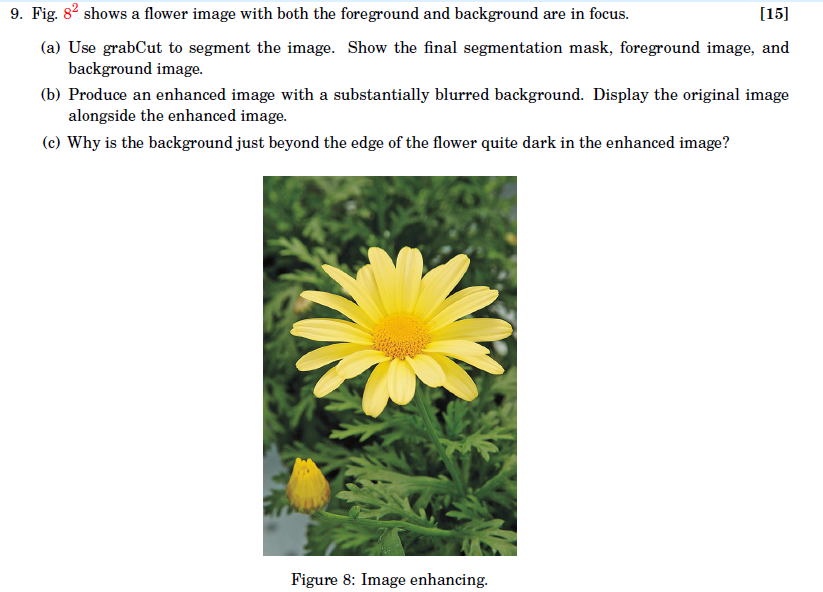

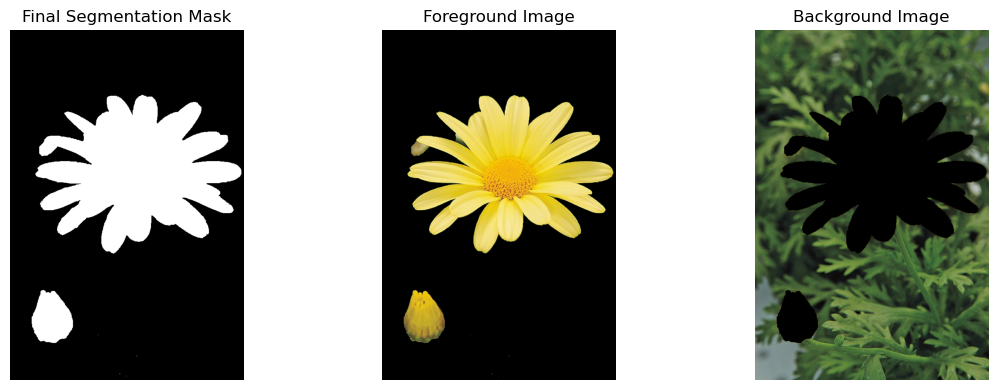

In [174]:
image9 = cv.imread('./images/daisy.jpg')
image9_rgb = cv.cvtColor(image9, cv.COLOR_BGR2RGB)

mask = np.zeros(image9.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, image9.shape[1]-50, image9.shape[0]-50)

cv.grabCut(image9_rgb, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image9_rgb * mask2[:, :, np.newaxis]
background = image9_rgb * (1 - mask2)[:, :, np.newaxis]

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(mask2, cmap='gray')
plt.title("Final Segmentation Mask")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(foreground)
plt.title("Foreground Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(background)
plt.title("Background Image")
plt.axis('off')

plt.tight_layout()
plt.show()

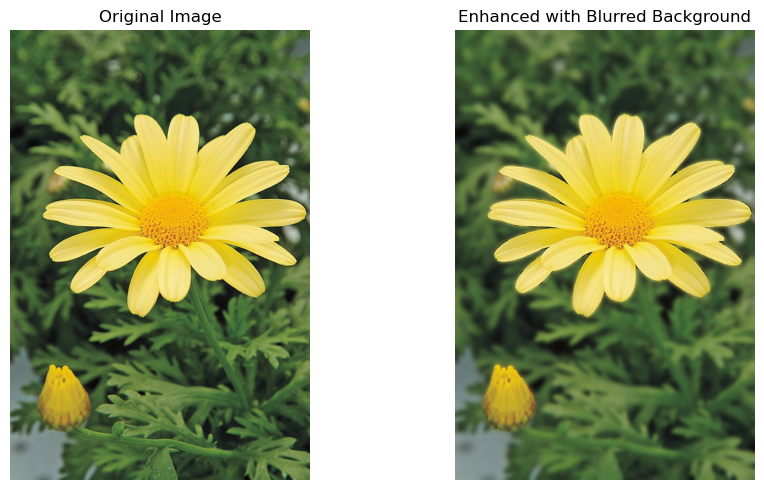

In [175]:
blurred_bg = cv.GaussianBlur(image9_rgb, (21, 21), 0)
enhanced_image = blurred_bg.copy()
enhanced_image[mask2 == 1] = image9_rgb[mask2 == 1]


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image9_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced with Blurred Background")
plt.axis('off')

plt.tight_layout()
plt.show()